### 1. Importing Necessary Libraries

In [51]:
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
df = pd.read_csv('FlowStatsfile.csv')
df.head()

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,...,20,100,0,50776,3351216,12694.00,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,...,20,100,0,209360,11834974848,52340.00,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10.0.0.35424610.0.0.550501,10.0.0.3,54246,10.0.0.5,5050,1,0,8,...,20,100,0,3,294,0.75,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10.0.0.55424610.0.0.350501,10.0.0.5,54246,10.0.0.3,5050,1,0,0,...,20,100,0,3,294,0.75,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,0,8,...,20,100,0,3,294,0.75,7.092199e-09,7.350000e+01,6.950355e-07,0


In [53]:
df['label'].value_counts()
df.dropna(inplace=True)

### 2. Data Loading and Preprocessing

We will perform a standardized preprocessing for all models to ensure a fair comparison. This includes:
1. Loading the `FlowStatsfile.csv` dataset.
2. Cleaning numerical columns by removing periods.
3. Dropping the 'flags' column as it is not needed for training.
4. Splitting the data into training (75%) and testing (25%) sets.

In [54]:
def load_and_preprocess_data(file_path='FlowStatsfile.csv'):
    print("Loading and preprocessing data...")
    flow_dataset = pd.read_csv(file_path)
    # Clean numerical columns
    for col in [2, 3, 5]:
        if flow_dataset.iloc[:, col].dtype == 'object':
            flow_dataset.iloc[:, col] = flow_dataset.iloc[:, col].str.replace('.', '')

    # Drop the 'flags' feature for consistency across models
    if 'flags' in flow_dataset.columns:
        flow_dataset = flow_dataset.drop(columns=['flags'])

    # Prepare features (X) and target (y)
    X_flow = flow_dataset.drop('label',axis=1)
    y_flow = flow_dataset['label']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_flow, y_flow, test_size=0.20, random_state=42)
    print("Data loaded and preprocessed successfully.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_and_preprocess_data()

Loading and preprocessing data...
Data loaded and preprocessed successfully.
X_train shape: (2134018, 20)
X_test shape: (533505, 20)


### 3. Model Training and Evaluation

We will now train each of the five models and evaluate their performance. The metrics (Accuracy, Precision, Recall, F1-Score) and training time for each will be stored for later comparison.

In [55]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
        "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0),
        "Logistic Regression": LogisticRegression(solver='liblinear', random_state=0),
        "Naive Bayes": GaussianNB()
        }

    results = []

    print("Training and evaluating models...")

    for name, model in models.items():
        print("-" * 40)
        print(f"Training {name}...")


        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1,
            "Training Time (s)": training_time
        })

        print(f"Model: {name}, Training Time: {training_time:.2f}s, Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")

    print("-" * 40)
    return pd.DataFrame(results)

results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)

Training and evaluating models...
----------------------------------------
Training Random Forest...
Model: Random Forest, Training Time: 27.80s, Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-score: 1.000
----------------------------------------
Training Decision Tree...
Model: Decision Tree, Training Time: 13.84s, Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-score: 1.000
----------------------------------------
Training Logistic Regression...
Model: Logistic Regression, Training Time: 18.86s, Accuracy: 0.661, Precision: 0.661, Recall: 1.000, F1-score: 0.796
----------------------------------------
Training Naive Bayes...
Model: Naive Bayes, Training Time: 8.72s, Accuracy: 0.714, Precision: 1.000, Recall: 0.567, F1-score: 0.724
----------------------------------------


### 4. Performance Comparison

Below is a summary table comparing the performance of all trained models.

In [56]:
results_df.round(4)

,Model,Accuracy,Precision,Recall,F1-score,Training Time (s)
0,Random Forest,1.0000,1.0000,1.000,1.0000,27.7960
1,Decision Tree,1.0000,1.0000,1.000,1.0000,13.8410
2,Logistic Regression,0.6608,0.6608,1.000,0.7958,18.8623
3,Naive Bayes,0.7138,1.0000,0.567,0.7237,8.7237


### 5. Visual Comparison of Models

Finally, we visualize the performance metrics and training times to easily compare the models.

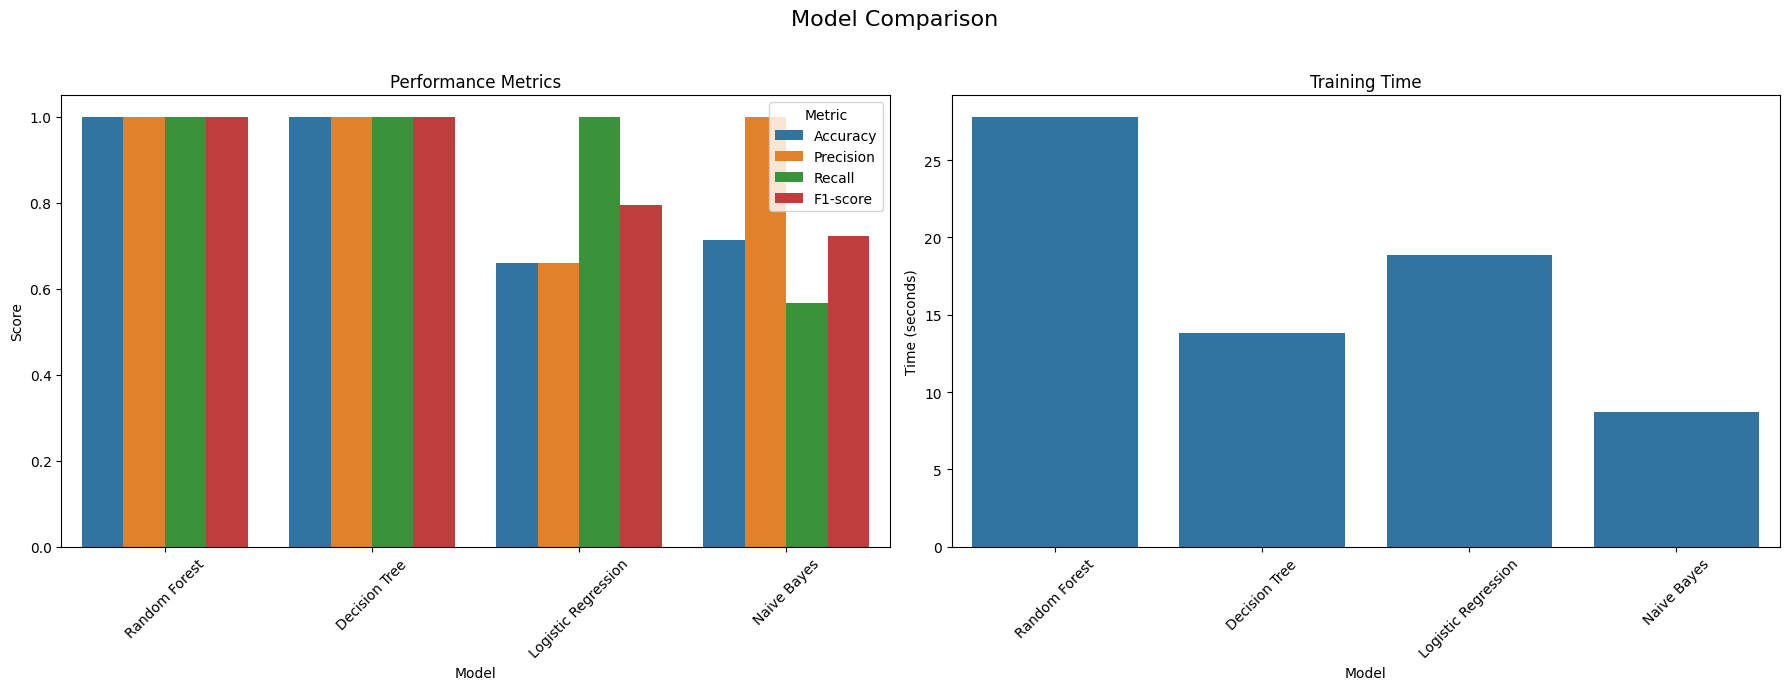

In [57]:
# Melt the DataFrame to plot all metrics vs model
df_melted = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Training Time (s)'],
                               var_name='Metric', value_name='Value')

# Separate performance metrics and training time for different scales
performance_metrics = df_melted[df_melted['Metric'] != 'Training Time (s)']
training_time = df_melted[df_melted['Metric'] == 'Training Time (s)']

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Comparison', fontsize=16)

# Plot for performance metrics
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_metrics, ax=axes[0])
axes[0].set_title('Performance Metrics')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1.05) # Scores are between 0 and 1
axes[0].tick_params(axis='x', rotation=45)

# Plot for training time
sns.barplot(x='Model', y='Value', data=training_time, ax=axes[1])
axes[1].set_title('Training Time')
axes[1].set_ylabel('Time (seconds)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()